## 学习算法的步骤
### 1、mini-batch
### 2、计算梯度
### 3、更新参数
### 4、重复以上步骤

In [56]:
import sys,os
sys.path.append(os.pardir) 
from common.functions import *
from common.gradient import numerical_gradient

### 二层神经网络的类
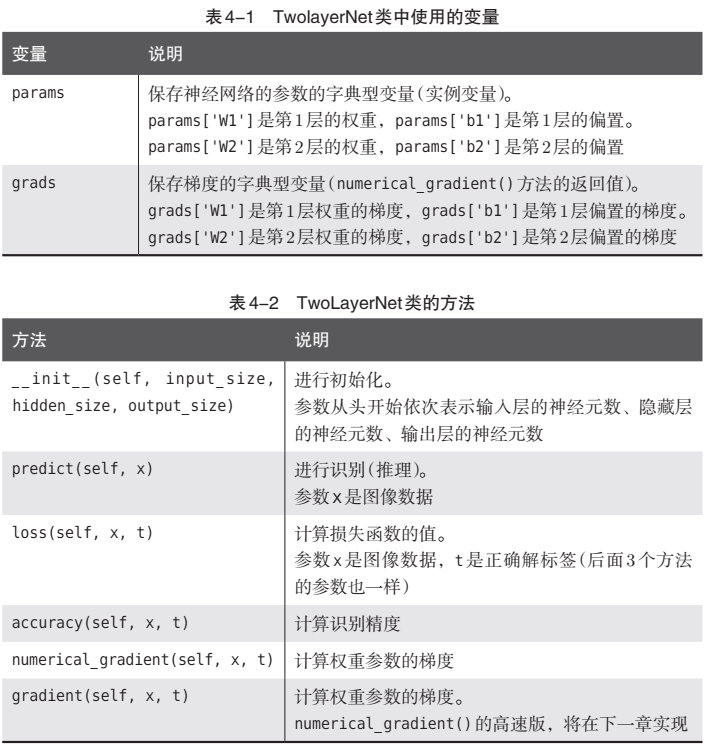

In [57]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,\
                 weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):     # 得出预测结果
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    # x:输入数据, t:监督数据
    def loss(self, x, t):      # 损失函数
        y = self.predict(x)
        return cross_entropy_error(y, t)
   
    def accuracy(self, x, t):    
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):  # 计算权重参数的梯度
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

In [58]:
s = np.random.randn(3, 4) #生成3*4的随机矩阵
print(s)

[[ 0.29738529  0.70554544 -0.31495547  0.52023297]
 [ 1.02527895  1.54617183 -1.81367403 -1.30510544]
 [-1.49874451  0.54688944 -1.12066636 -0.7124514 ]]


In [59]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape # (784, 100)

(784, 100)

In [60]:
net.params['b1'].shape # (100,)

(100,)

In [61]:
net.params['W2'].shape # (100, 10)

(100, 10)

In [62]:
net.params['b2'].shape # (10,)

(10,)

In [63]:
x = np.random.rand(100, 784) # 伪输入数据（100笔）
y = net.predict(x)

In [64]:
x = np.random.rand(100, 784) # 伪输入数据（100笔）
t = np.random.rand(100, 10) # 伪正确解标签（100笔）
grads = net.numerical_gradient(x, t) # 计算梯度

In [65]:
grads['W1'].shape # (784, 100)
grads['b1'].shape # (100,)
grads['W2'].shape # (100, 10)
grads['b2'].shape # (10,)

(10,)

#### mini-batch 的实现

In [66]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

In [67]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

In [68]:
# 超参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [74]:
for i in range(iters_num):
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size)  # 获取随街的索引
    x_batch = x_train[batch_mask]  # 根据随机的索引来获取
    t_batch = t_train[batch_mask]  
   
    # 计算梯度
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 高速版!
     # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 记录学习过程
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    

KeyboardInterrupt: 

In [72]:
import matplotlib.pylab as plt

In [ ]:
size = 1000
y = train_loss_list[:size]
x = np.arange(1,size,1)
plt.plot(x,y,linewidth=1.0)

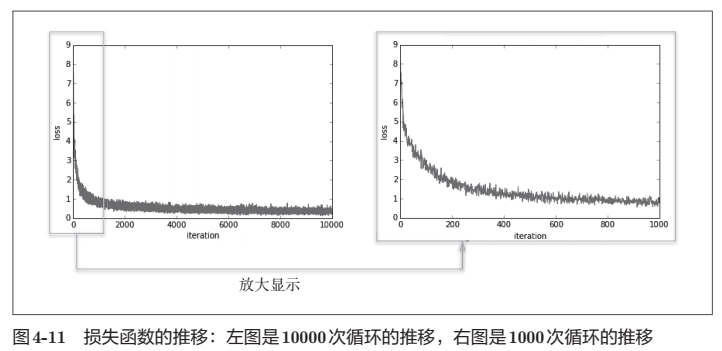
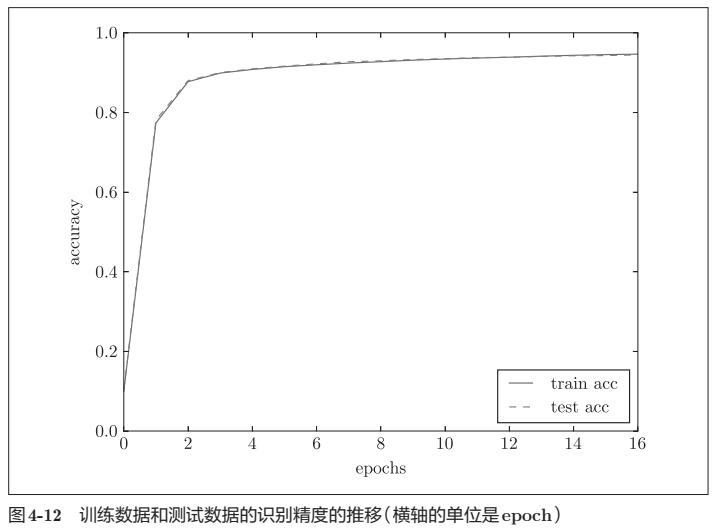

#### 更改上面的代码 ，添加识别精度的记录
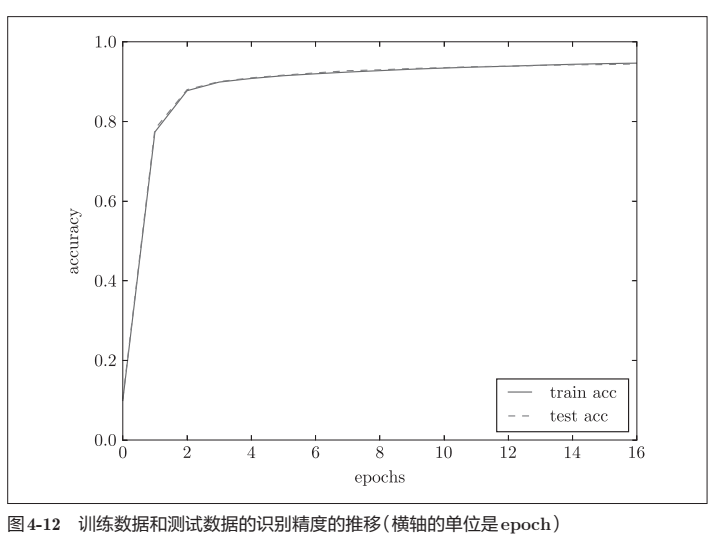

In [ ]:
train_loss_list = []
train_acc_list = []
test_acc_list = []
# 平均每个epoch的重复次数
iter_per_epoch = max(train_size / batch_size, 1)

In [ ]:
for i in range(iters_num):
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 高速版!
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 计算每个epoch的识别精度
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

In [ ]:
y = test_acc_list
x = np.arange(1,test_acc_list.size,1)
plt.plot(x,y,linewidth=1.0)